#📌 Extracción

In [22]:
import pandas as pd

datos = pd.read_json('/content/TelecomX_Data (1).json')
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [23]:
columnas = list(datos.columns)
columnas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [24]:
df_customer = pd.json_normalize(datos['customer'])
df_phone = pd.json_normalize(datos['phone'])
df_internet = pd.json_normalize(datos['internet'])
df_account = pd.json_normalize(datos['account'])

columnaNueva = pd.concat([datos[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)
columnaNueva.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#📊 Carga y análisis

In [25]:
columnaNueva['Cuentas_Diarias'] = (columnaNueva['Charges.Monthly'] / 30).round(2)

In [26]:
columnaNueva[['customerID', 'Charges.Monthly', 'Cuentas_Diarias']].head()

,customerID,Charges.Monthly,Cuentas_Diarias
0,0002-ORFBO,65.6,2.19
1,0003-MKNFE,59.9,2.00
2,0004-TLHLJ,73.9,2.46
3,0011-IGKFF,98.0,3.27
4,0013-EXCHZ,83.9,2.80


In [27]:
columnaNueva.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.80


In [28]:
cols_binarias = [col for col in columnaNueva.columns if set(columnaNueva[col].unique()).issubset({'Yes', 'No'})]

for col in cols_binarias:
    columnaNueva[col] = columnaNueva[col].map({'Yes': 1, 'No': 0})

print("Columnas convertidas a binario:", cols_binarias)


Columnas convertidas a binario: ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']


In [29]:
columnaNueva.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,No,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.4,2.80


In [30]:
columnaNueva = columnaNueva.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Baja',
    'gender': 'Género',
    'SeniorCitizen': 'AdultoMayor',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'MesesContrato',
    'PhoneService': 'ServicioTeléfono',
    'MultipleLines': 'VariasLíneas',
    'InternetService': 'ServicioInternet',
    'OnlineSecurity': 'SeguridadOnline',
    'OnlineBackup': 'RespaldoOnline',
    'DeviceProtection': 'ProtecciónDispositivo',
    'TechSupport': 'SoporteTécnico',
    'StreamingTV': 'TVStreaming',
    'StreamingMovies': 'PelículasStreaming',
    'Contract': 'Contrato',
    'PaperlessBilling': 'FacturaDigital',
    'PaymentMethod': 'MétodoPago',
    'Charges.Monthly': 'CargoMensual',
    'Charges.Total': 'CargoTotal',
    'Cuentas_Diarias': 'CuentasDiarias'
})

#📄Informe final

In [31]:
columnaNueva.head()


,ID_Cliente,Baja,Género,AdultoMayor,Pareja,Dependientes,MesesContrato,ServicioTeléfono,VariasLíneas,ServicioInternet,...,ProtecciónDispositivo,SoporteTécnico,TVStreaming,PelículasStreaming,Contrato,FacturaDigital,MétodoPago,CargoMensual,CargoTotal,CuentasDiarias
0,0002-ORFBO,No,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,No,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.4,2.80


In [32]:
columna = columnaNueva['CuentasDiarias']
media = columna.mean()
mediana = columna.median()
desviacion = columna.std()
minimo = columna.min()
maximo = columna.max()
cuartiles = columna.quantile([0.25, 0.5, 0.75])

print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Desviación estándar: {desviacion}")
print(f"Mínimo: {minimo}")
print(f"Máximo: {maximo}")
print("Cuartiles:")
print(cuartiles)



Media: 2.157291867345535
Mediana: 2.34
Desviación estándar: 1.004406798729517
Mínimo: 0.61
Máximo: 3.96
Cuartiles:
0.25    1.180
0.50    2.340
0.75    2.995
Name: CuentasDiarias, dtype: float64


In [42]:
print(columnaNueva['Baja'].unique())

['No' 'Yes' '']


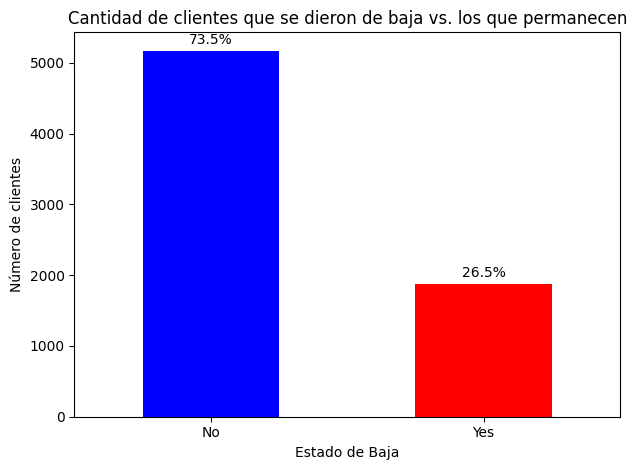

In [48]:
import matplotlib.pyplot as plt

valores_validos = columnaNueva[columnaNueva['Baja'].isin(['Yes', 'No'])]

baja_counts = valores_validos['Baja'].value_counts()

ax = baja_counts.plot(kind='bar', color=['blue', 'red'])

plt.title('Cantidad de clientes que se dieron de baja vs. los que permanecen')
plt.xlabel('Estado de Baja')
plt.ylabel('Número de clientes')
plt.xticks(rotation=0)

total = baja_counts.sum()
for i, valor in enumerate(baja_counts):
    porcentaje = f'{(valor / total) * 100:.1f}%'
    plt.text(i, valor + 100, porcentaje, ha='center', fontsize=10)

plt.tight_layout()
plt.show()


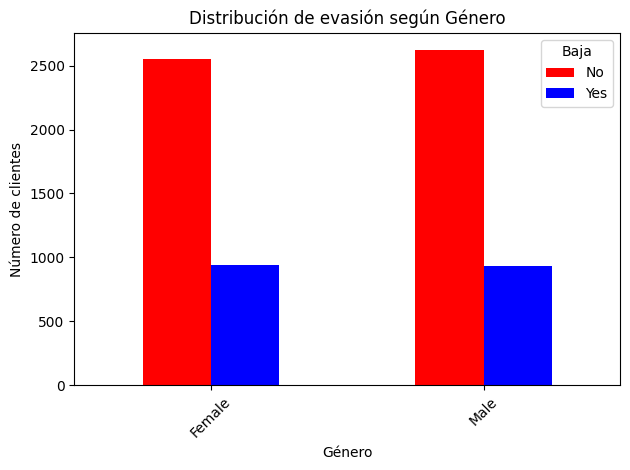

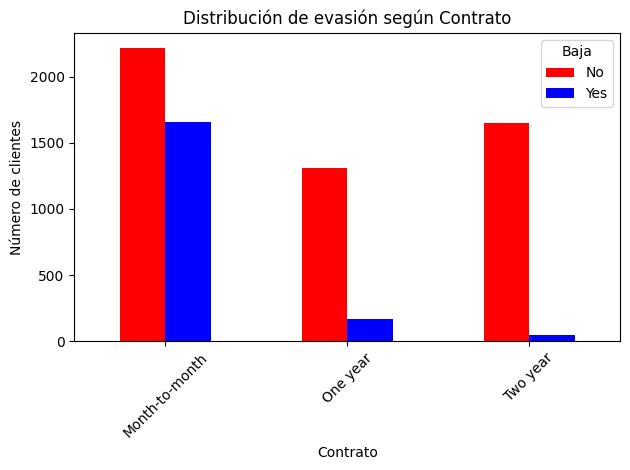

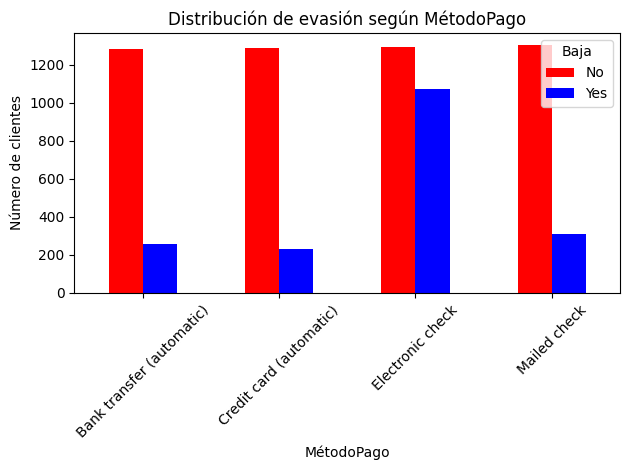

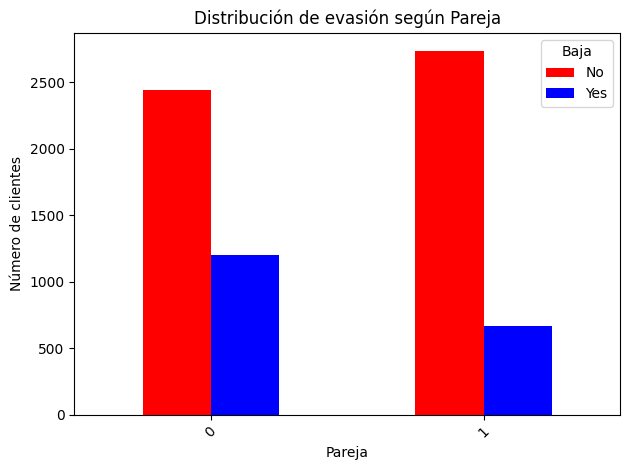

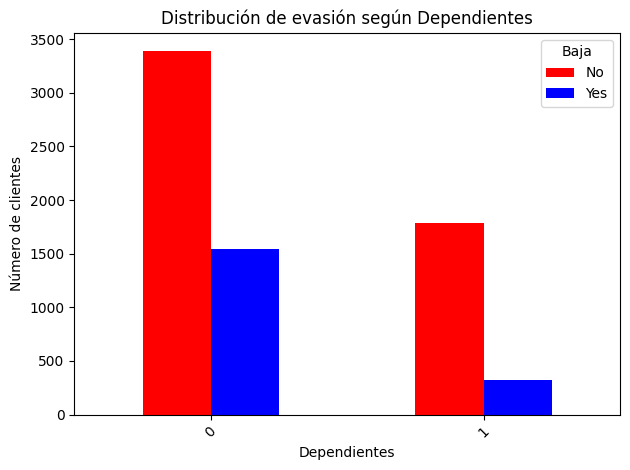

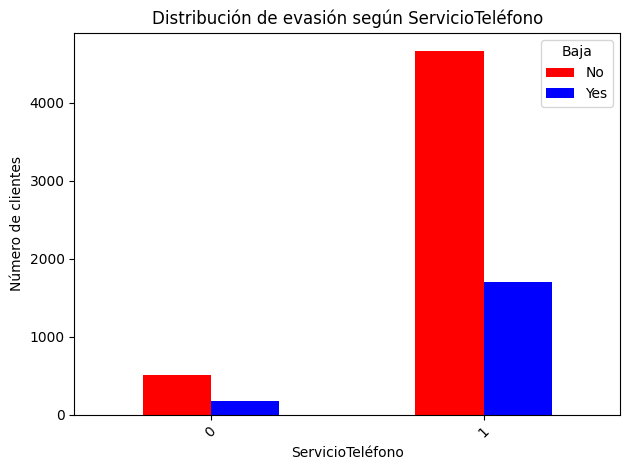

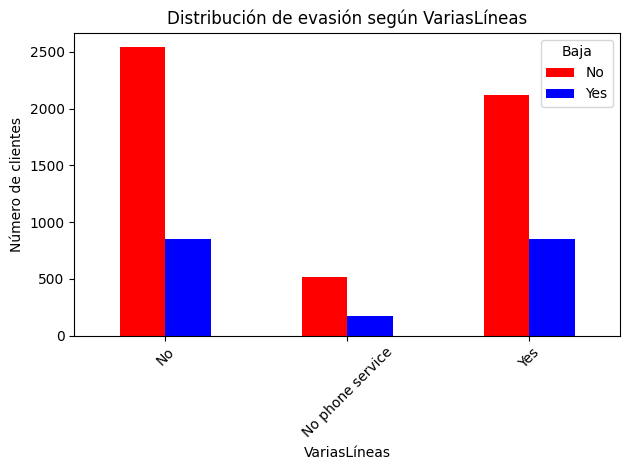

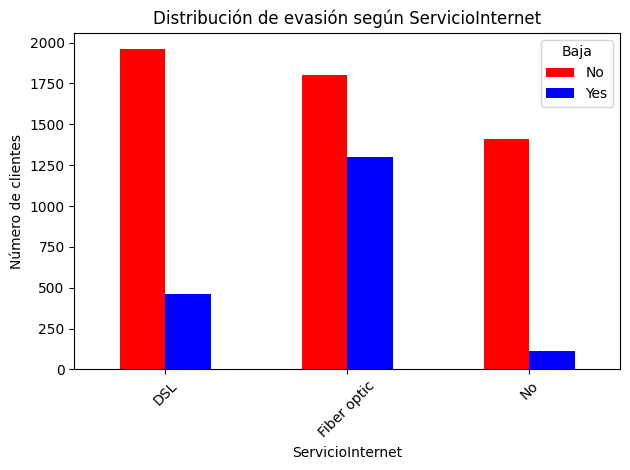

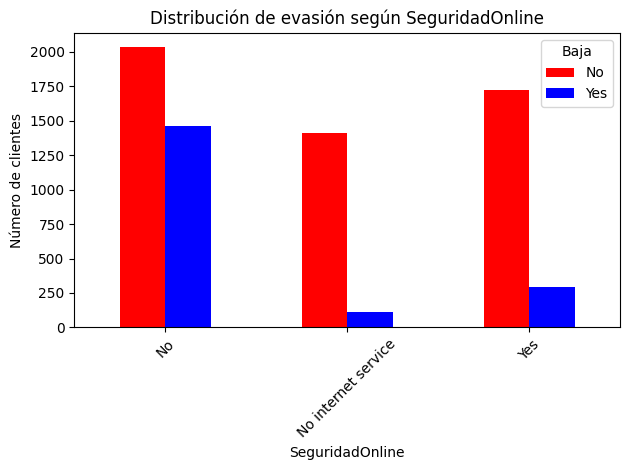

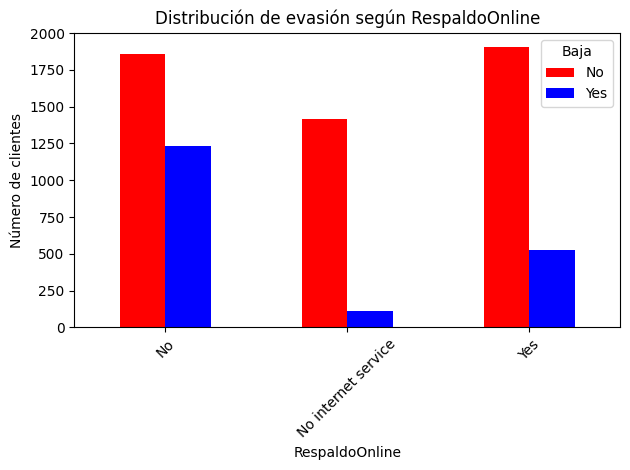

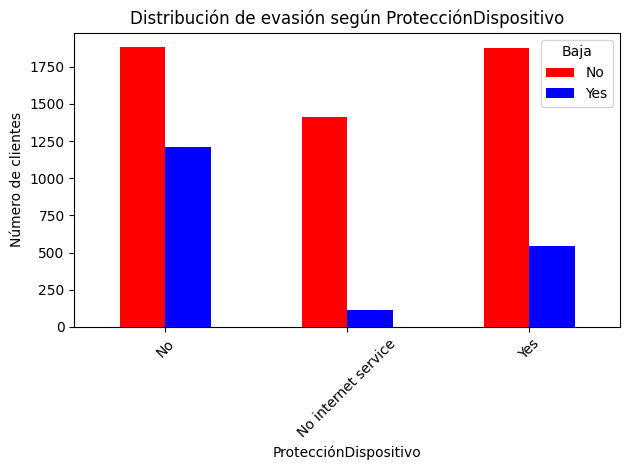

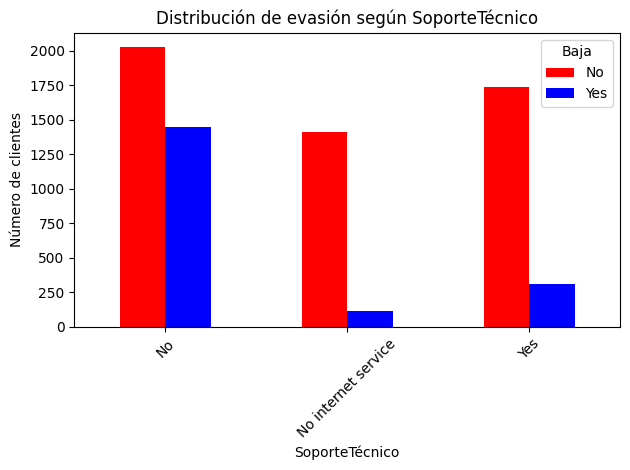

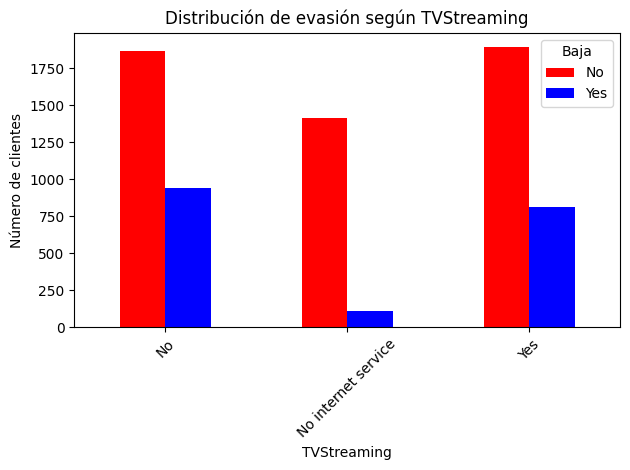

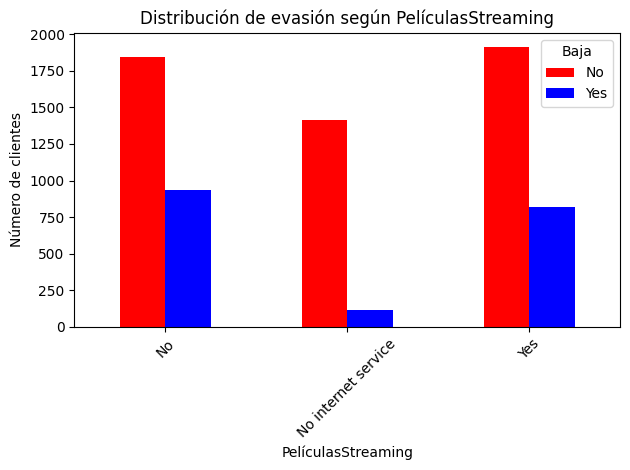

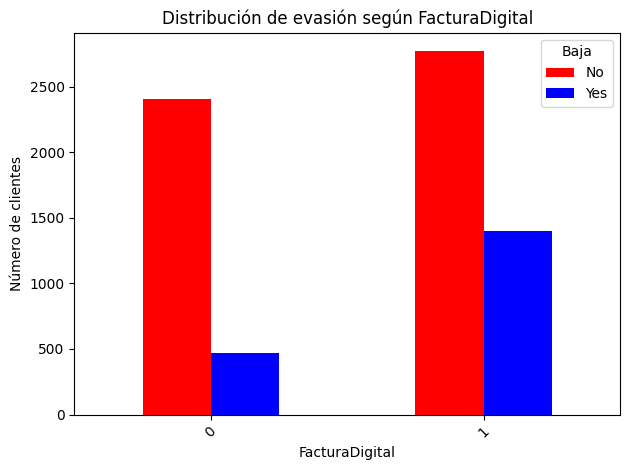

In [54]:
variables_categoricas = ['Género', 'Contrato', 'MétodoPago', 'Pareja', 'Dependientes', 'ServicioTeléfono',
                        'VariasLíneas', 'ServicioInternet', 'SeguridadOnline', 'RespaldoOnline', 'ProtecciónDispositivo',
                        'SoporteTécnico', 'TVStreaming', 'PelículasStreaming', 'FacturaDigital']

valores_validos = columnaNueva[columnaNueva['Baja'].isin(['Yes', 'No'])]

for var in variables_categoricas:
    tabla_cruzada = pd.crosstab(valores_validos[var], valores_validos['Baja'])
    ax = tabla_cruzada.plot(kind='bar', stacked=False, color=['red', 'blue'])
    plt.title(f'Distribución de evasión según {var}')
    plt.xlabel(var)
    plt.ylabel('Número de clientes')
    plt.xticks(rotation=45)
    plt.legend(title='Baja')
    plt.tight_layout()
    plt.show()


<ipython-input-56-7f4888475123>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Baja', y=var, data=valores_validos, palette={'No': 'blue', 'Yes': 'red'})


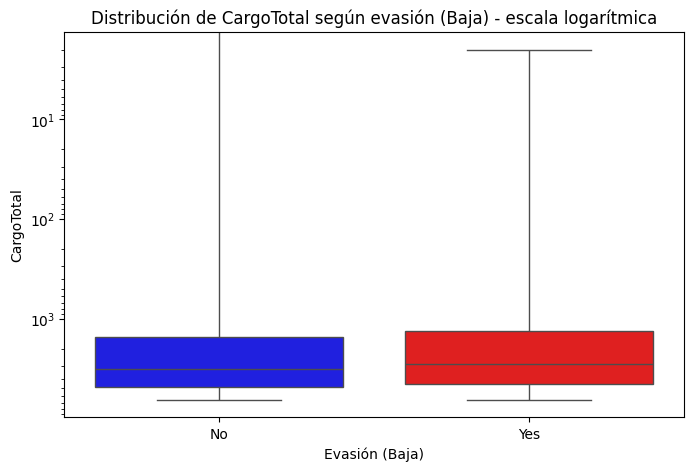

<ipython-input-56-7f4888475123>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Baja', y=var, data=valores_validos, palette={'No': 'blue', 'Yes': 'red'})


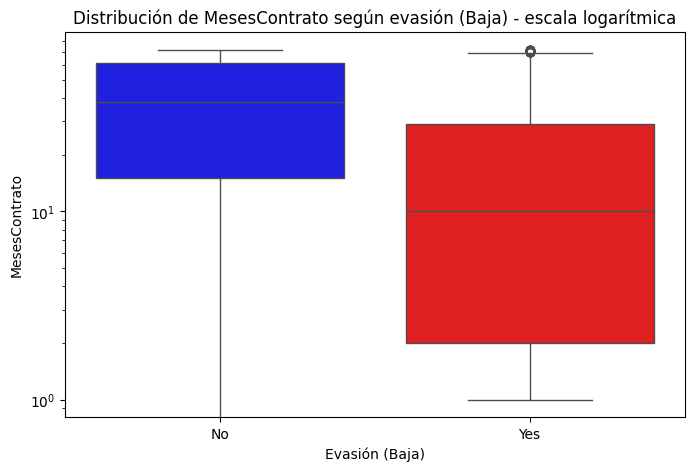

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

valores_validos = columnaNueva[columnaNueva['Baja'].isin(['Yes', 'No'])]

variables_numericas = ['CargoTotal', 'MesesContrato']

for var in variables_numericas:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Baja', y=var, data=valores_validos, palette={'No': 'blue', 'Yes': 'red'})
    plt.yscale('log')
    plt.title(f'Distribución de {var} según evasión (Baja) - escala logarítmica')
    plt.xlabel('Evasión (Baja)')
    plt.ylabel(var)
    plt.show()



#Introducción
En este documento queremos entender por qué algunos clientes deciden cancelar su servicio, Saber qué características tienen estos clientes, en que nos puede ayudar a mejorar y evitar que más se vayan.

##Limpieza y Preparación de Datos##
- Se cambiaron los nombres de las columnas para que sean más fáciles de entender.
- Se cambiaron las categorías como género, tipo de contrato y método de pago estén bien definidas.

- se seleccionan las variables importantes para el análisis, como el total que gastó el cliente y cuánto tiempo ha tenido el servicio.

##Análisis de los Datos
###*Datos con categorías*
Aquí se hicieron gráficos para ver cómo se distribuyen los clientes que cancelaron y los que siguen según categorías como género, tipo de contrato y método de pago.



###*Datos numéricos*
Se comparan cuánto gastaron y cuánto tiempo han tenido el servicio los clientes que cancelaron frente a los que no. Usamos gráficos para ver si hay diferencias entre estos dos grupos.


#Conclusiones
- Los clientes con contratos cortos o que gastan menos tienden a cancelar más.

- Algunos tipos de contrato o métodos de pago tienen más clientes que cancelan.

- Los clientes que llevan más tiempo con el servicio y gastan más suelen quedarse.

#Recomendaciones
Hacer ofertas especiales o beneficios para los clientes con contratos cortos o con ciertos métodos de pago para que no cancelen.

Usar esta información para mejorar la comunicación y ofertas para los clientes.

Determinar una mejor organizacion para que los clientes no cancelen y sigan con nosotro.